# Polynomial Regression

Linear regression predictions not accurate enough? It's okay, we have a more powerful tool - polynomial regression. You must have a lot of friends from Huawei, Ali, ByteDance and other Internet companies around you, or you work in these companies yourself. In these companies, different ranks have their corresponding salary ranges, and promotions are often accompanied by salary increases. Today we're going to look at the relationship between promotions and salary increases.

Taking Huawei as an example, in this real data I found, the annual salary of level 13 employees is 19-24 million, level 15 is 30-37 million, level 18 is 1.03-1.68 million, and level 19 and above may be able to reach 2-4 million. In comparison, Internet companies ByteDance and Ali pay a bit more per level.

![salary-hua](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/salary-hua.png)

On closer inspection you can certainly notice that the increase in salary is not linear for each promotion in these companies. We see that at lower positions, a promotion can only bring about a $100,000 raise at a time, whereas at higher positions, a promotion can bring hundreds of thousands or even one or two million raises. This relationship is no longer linear, and it is certainly not possible to accurately characterize the relationship between rank and salary using the simple linear model we introduced earlier. This is where we need to introduce the new model of Polynomial Regression.

Here, let's recall a math concept we learned in elementary school - parabola. For example, in the parabola corresponding to the quadratic equation y = x^2 in the figure, the larger the value of x, the larger the slope of the curve, and the faster the increase in the value of y, which is similar to the actual situation we observe in the workplace in terms of promotions and salary increases.

![polynomial](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/polynomial.png)

In fact, a parabola is a polynomial regression and has a maximum power of 2. The model equation that corresponds to this case in our example of predicting salary is: Salary = b1 × Job Grade + b2 × Job Grade^2 + Intercept. In this model, the slope b1 represents the linear effect of rank, the slope b2 represents the quadratic effect of rank - that is, the curvature - and the intercept represents the base salary when the job class is zero.

![salary-polynomial](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/salary-polynomial.png)

## Importing the libraries

Having introduced the principles of polynomial regression, let's now get our hands dirty and implement a polynomial regression model that can predict the trend of salary increases after a promotion.

The data we use here is from Position_Salaries, an open source dataset from Kaggle.

![Position_Salaries](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/Position_Salaries.png)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

First we read the data and have grade X as a feature and salary Y as a label.

In [2]:
dataset = pd.read_csv('https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/code-for-videos/data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

We then polynomially transform the features by adding the squares and cubes of the ranks in there, which is done by calling sklearn's PolynomialFeatures.fit_transform() through the code in the purple section, so that the features go from having only one column per row in the red box to having four columns in each row in the green box. The first of these columns is the 0th power of X, which is always 1, so just ignore it. Finally, we use sklearn's LinearRegression to train the data, which is the blue code in the figure, so that we can get our model.

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)
X_poly = poly_transformer.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [6]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

## Visualising the Linear Regression results

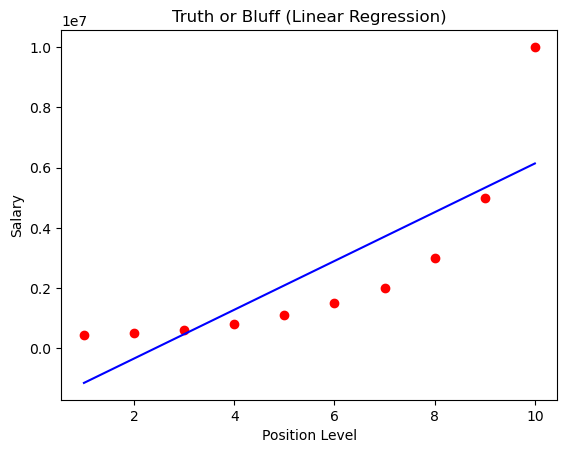

In [7]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

So how well did we fit using polynomial regression? As you can see from the graph the results are still good, the red data points basically fall around the blue model curve.

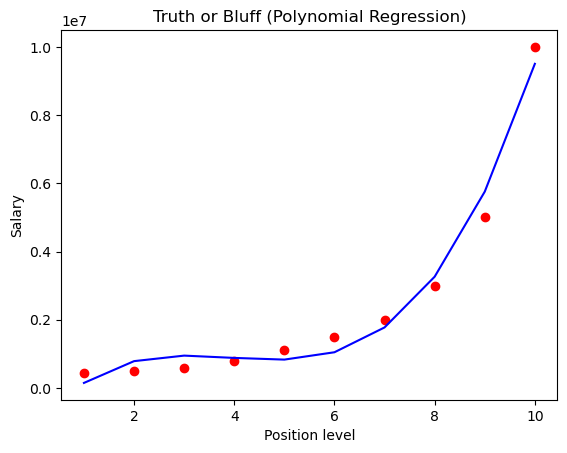

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_transformer.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

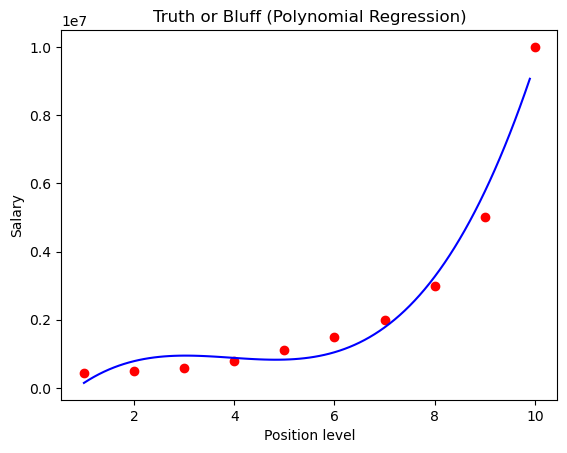

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_transformer.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [10]:
lin_reg.predict([[13.5]])

array([8965303.03030303])

## Predicting a new result with Polynomial Regression

Simply by inputting a value into the predict() method of the model, we can get the predicted result, for example, the salary corresponding to the grade 13.5 is $36.06 million. However, again the input 13.5 needs to be polynomially transformed before we can call predict().

In [11]:
lin_reg_2.predict(poly_transformer.fit_transform([[13.5]]))

array([36064485.72260993])

Of course, in reality, we often hear that the salary of CEOs of listed companies is often tens of millions of dollars to start with, and there is no lack of hundreds of millions of dollars. If in reality the impact of rank on the rate of wage growth is even greater, we can raise the polynomial regression to a higher power, so that the same rank X plus 1 will bring a more significant change in salary.

![polynomial-3](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/polynomial-3.png)

Actually, polynomial regression and linear regression are also equivocally interchangeable. If you look at grade level as a feature, we're doing a polynomial regression with a multivariate multiple, but if you look at level, level^2, level^3, etc. as features, doesn't it become a linear regression with a multivariate multiple? Because the parameters of our model have always remained b1, b2 up to bn.

![salary-feature](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/salary-feature.png)

If you are interested, you can try to fit polynomials with higher powers in our code above to see the effect, and even more so, you can use the data I provided above to figure out how much the middle and senior management, or even the CEOs, of these big Internet companies are paid.
